In [43]:
"""
Parametrized Circuits: https://youtu.be/adeYx7bwYrA
https://www.w3resource.com/python-exercises/numpy/python-numpy-exercise-93.php
"""

'\nParametrized Circuits: https://youtu.be/adeYx7bwYrA\nhttps://www.w3resource.com/python-exercises/numpy/python-numpy-exercise-93.php\n'

In [6]:
import numpy as np
from qiskit.circuit import ParameterVector
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import random_statevector, Statevector
import random
import matplotlib.pyplot as plt

In [18]:
q = 4
qr = QuantumRegister(q, 'q')
def circuit_creator(base_circuit=None):
    qc = QuantumCircuit(qr)
    theta_i = [random.random() for _ in range(q)]
    theta_i = iter(theta_i) 
    # ODD blocks
    qc.rx(next(theta_i),0)
    qc.rx(next(theta_i),1)
    qc.rx(next(theta_i),2)
    qc.rx(next(theta_i),3)
    # Even Blocks
    theta_j = [random.random() for _ in range(q)]
    theta_j = iter(theta_j) 
    qc.rx(next(theta_j),0)
    qc.rx(next(theta_j),1)
    qc.rx(next(theta_j),2)
    qc.rx(next(theta_j),3)
    qc.cz(0,1)
    qc.cz(0,2)
    qc.cz(0,3)
    qc.cz(1,2)
    qc.cz(1,3)
    qc.cz(2,3)
    if base_circuit is None:
        return qc
    return qc.combine(base_circuit)

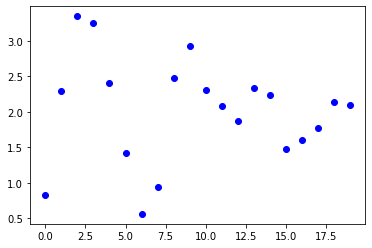

In [22]:
L = 20
phi =  random_statevector(dims=(2, 2, 2, 2))
psi = Statevector.from_label('0000')
transpiled_qc = circuit_creator()
y_axis = []
for i in range(L):
    ret = psi.evolve(transpiled_qc)
    min = np.linalg.norm(psi.data-ret.data)**2
    y_axis.append(min)
    transpiled_qc = circuit_creator(transpiled_qc)
transpiled_qc.draw()
plt.plot([i for i in range(L)],y_axis,'bo')